In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## start from here

In [2]:
tdf_sat_hourly = pd.read_csv('t1_sat.csv')
tdf_land_daily = pd.read_csv('t2_sat.csv')

In [3]:
for_plots = tdf_sat_hourly.copy()
for_plots['Day'] = for_plots['Day'].astype('str')
for_plots['Year'] = for_plots['Year'].astype('str')

In [4]:
for_plots['Month'] = for_plots['Month'].replace({
    1:'January',
    2: 'February',
3: 'March',
4: 'April',
5: 'May',
6: 'June',
7: 'July',
8: 'August',
9: 'September',
10: 'October',
11: 'November',
12: 'December',
    
    })

for_plots['Season'] = for_plots['Month'] 
for_plots['Season'] = for_plots['Season'].replace({
 'January' : 'winter' ,
 'February' : 'winter' ,
 'March' : 'spring' ,
 'April' : 'spring' ,
 'May' : 'spring' ,
 'June' : 'summer' ,
 'July' : 'summer' ,
 'August' : 'summer' ,
 'September' : 'autumn' ,
 'October' : 'autumn' ,
 'November' : 'autumn' ,
 'December' : 'winter' ,
})

In [5]:
for_plots.head()

,Unnamed: 0,Year,Month,Day,Hour,Val,Date,Season
0,7,2014,January,1,7,0.0,2014-01-01 07:00:00,winter
1,8,2014,January,1,8,2.0,2014-01-01 08:00:00,winter
2,9,2014,January,1,9,3.0,2014-01-01 09:00:00,winter
3,10,2014,January,1,10,4.0,2014-01-01 10:00:00,winter
4,11,2014,January,1,11,14.0,2014-01-01 11:00:00,winter


In [6]:
for_plots['Year'] = for_plots['Year'].apply(str)

In [7]:
for_plots.dtypes

Unnamed: 0      int64
Year           object
Month          object
Day            object
Hour            int64
Val           float64
Date           object
Season         object
dtype: object

In [8]:
fig = px.scatter_polar(for_plots, r="Val", theta="Year",color="Year")
fig.show()

In [9]:
fig = px.scatter_polar(for_plots, r="Val", theta="Month",color="Month")
fig.show()

In [10]:
for_plots.head()

,Unnamed: 0,Year,Month,Day,Hour,Val,Date,Season
0,7,2014,January,1,7,0.0,2014-01-01 07:00:00,winter
1,8,2014,January,1,8,2.0,2014-01-01 08:00:00,winter
2,9,2014,January,1,9,3.0,2014-01-01 09:00:00,winter
3,10,2014,January,1,10,4.0,2014-01-01 10:00:00,winter
4,11,2014,January,1,11,14.0,2014-01-01 11:00:00,winter


In [11]:
si = for_plots.groupby(['Month','Day'])['Val'].mean().reset_index().copy()

In [12]:
si['Day'] = si['Day'].apply(str)

In [13]:
si.dtypes

Month     object
Day       object
Val      float64
dtype: object

In [14]:
fig = px.line_polar(si, r='Val', theta='Day', 
                    color='Month', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

fig.write_image('plots/i3.pdf')

In [15]:
si = for_plots.groupby(['Season','Day'])['Val'].mean().reset_index().copy()

In [16]:
si.head()

,Season,Day,Val
0,autumn,1,72.077922
1,autumn,10,65.173160
2,autumn,11,64.025974
3,autumn,12,64.411255
4,autumn,13,57.549784


In [17]:
si['Day'] = si['Day'].apply(str)

In [18]:
si.dtypes

Season     object
Day        object
Val       float64
dtype: object

In [19]:
fig = px.line_polar(si, r='Val', theta='Day', 
                    color='Season', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

fig.write_image('plots/i3.pdf')

In [20]:
si = for_plots.groupby(['Year','Month'])['Val'].mean().reset_index().copy()
si['Month'] = si['Month'].replace({
    1:'January',
    2: 'February',
3: 'March',
4: 'April',
5: 'May',
6: 'June',
7: 'July',
8: 'August',
9: 'September',
10: 'October',
11: 'November',
12: 'December',})

In [21]:
fig = px.line_polar(si, r='Val', theta='Month', 
                    color='Year', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

fig.write_image('plots/i3.pdf')

In [22]:

fig = px.line(si, 
             x='Month', 
             y='Val', 
             color='Year',
            symbol="Year",
             markers=True)


fig.show()



In [23]:
si = for_plots.groupby(['Season','Day'])['Val'].mean().reset_index().copy()

In [24]:

fig = px.line(si, 
             x='Day', 
             y='Val', 
             color='Season',
            symbol="Season",
             markers=True)


fig.show()



c:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'GHI (W/m2)')

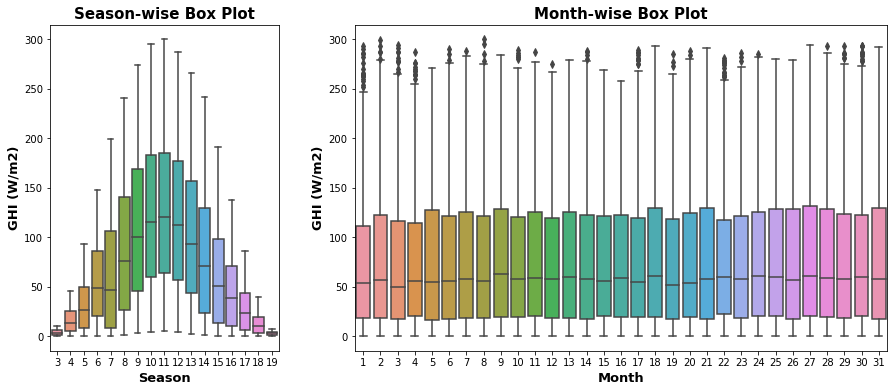

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6),gridspec_kw={'width_ratios': [1.5,3.5]})



sns.boxplot(for_plots['Hour'], for_plots['Val'], ax=ax[0])
ax[0].set_title('Season-wise Box Plot', fontsize = 15, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Season', fontsize = 13, fontdict=dict(weight='bold'))
ax[0].set_ylabel('GHI (W/m2)', fontsize = 13, fontdict=dict(weight='bold'))


sns.boxplot(for_plots['Day'], for_plots['Val'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot', fontsize = 15, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 13, fontdict=dict(weight='bold'))
ax[1].set_ylabel('GHI (W/m2)', fontsize = 13, fontdict=dict(weight='bold'))

#plt.savefig('plots/i5.pdf')

c:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'GHI (W/m2)')

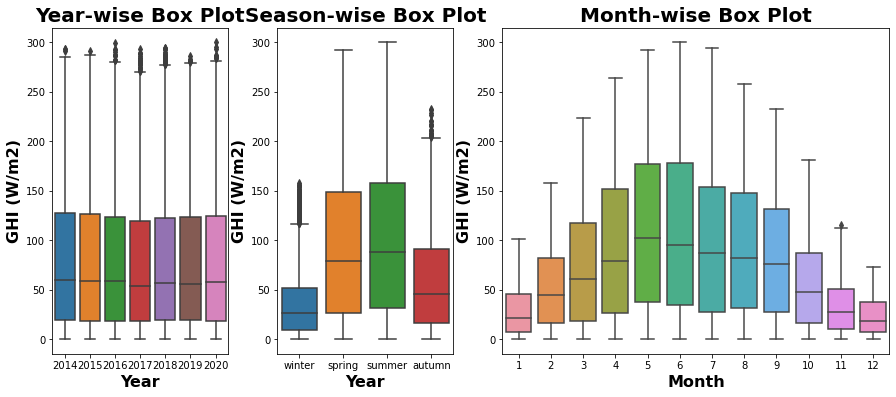

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),gridspec_kw={'width_ratios': [1.25,1.25,2.75]})


sns.boxplot(for_plots['Year'], for_plots['Val'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('GHI (W/m2)', fontsize = 16, fontdict=dict(weight='bold'))


sns.boxplot(for_plots['Season'], for_plots['Val'], ax=ax[1])
ax[1].set_title('Season-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('GHI (W/m2)', fontsize = 16, fontdict=dict(weight='bold'))


sns.boxplot(tdf_sat_hourly['Month'], tdf_sat_hourly['Val'], ax=ax[2])
ax[2].set_title('Month-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[2].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[2].set_ylabel('GHI (W/m2)', fontsize = 16, fontdict=dict(weight='bold'))

c:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



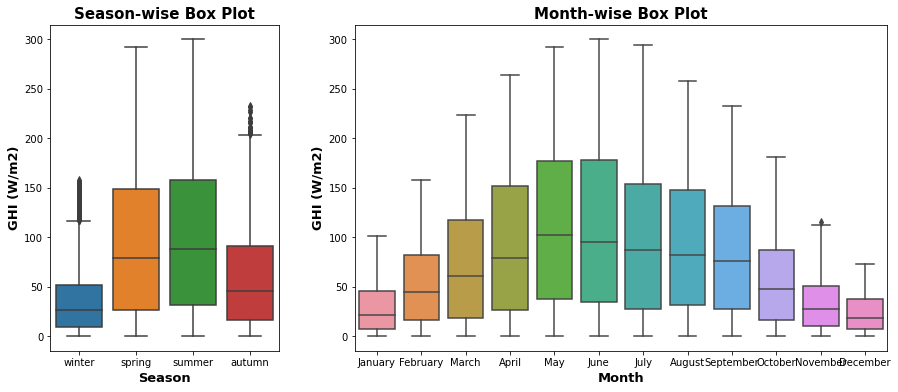

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6),gridspec_kw={'width_ratios': [1.5,3.5]})



sns.boxplot(for_plots['Season'], for_plots['Val'], ax=ax[0])
ax[0].set_title('Season-wise Box Plot', fontsize = 15, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Season', fontsize = 13, fontdict=dict(weight='bold'))
ax[0].set_ylabel('GHI (W/m2)', fontsize = 13, fontdict=dict(weight='bold'))


sns.boxplot(for_plots['Month'], for_plots['Val'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot', fontsize = 15, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 13, fontdict=dict(weight='bold'))
ax[1].set_ylabel('GHI (W/m2)', fontsize = 13, fontdict=dict(weight='bold'))

plt.savefig('plots/i5.pdf')

## store

In [28]:
for_plots['Month'] = for_plots['Month'].replace({
1: 'Jan',
2: 'Feb',
3: 'Mar',
4: 'Apr',
5: 'May',
6: 'Jun',
7: 'Jul',
8: 'Aug',
9: 'Sep',
10: 'Oct',
11: 'Nov',
12: 'Dec',

    
    })

for_plots['Season'] = for_plots['Month'] 
for_plots['Season'] = for_plots['Season'].replace({
 'Jan' : 'winter' ,
 'Feb' : 'winter' ,
 'Mar' : 'spring' ,
 'Apr' : 'spring' ,
 'May' : 'spring' ,
 'Jun' : 'summer' ,
 'Jul' : 'summer' ,
 'Aug' : 'summer' ,
 'Sep' : 'autumn' ,
 'Oct' : 'autumn' ,
 'Nov' : 'autumn' ,
 'Dec' : 'winter' ,
})

In [29]:
for_plots['Month'] = for_plots['Month'].replace({
    1:'January',
    2: 'February',
3: 'March',
4: 'April',
5: 'May',
6: 'June',
7: 'July',
8: 'August',
9: 'September',
10: 'October',
11: 'November',
12: 'December',
    
    })

for_plots['Season'] = for_plots['Month'] 
for_plots['Season'] = for_plots['Season'].replace({
 'January' : 'winter' ,
 'February' : 'winter' ,
 'March' : 'spring' ,
 'April' : 'spring' ,
 'May' : 'spring' ,
 'June' : 'summer' ,
 'July' : 'summer' ,
 'August' : 'summer' ,
 'September' : 'autumn' ,
 'October' : 'autumn' ,
 'November' : 'autumn' ,
 'December' : 'winter' ,
})